In [56]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [57]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.95, stratify=y_train)

In [59]:
print(len(y_train), len(y_val), len(y_test))

3000 57000 10000


In [60]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import learning_curve

In [61]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') 
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [62]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [63]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [64]:
def baseline_model():
  model = Sequential()
  model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
  return model

In [65]:
model = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=200, verbose=1)

In [66]:


train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, n_jobs=-1)

train_mean_1 = np.mean(train_scores, axis=1)
train_std_1 = np.std(train_scores, axis=1)
test_mean_1 = np.mean(test_scores, axis=1)
test_std_1 = np.std(test_scores, axis=1)

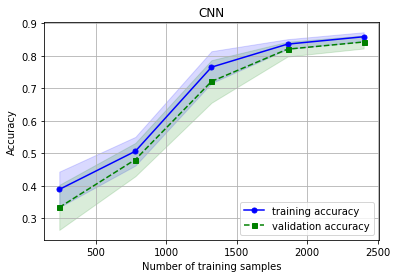

In [67]:
plt.plot(train_sizes, train_mean_1, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean_1 + train_std_1, train_mean_1 - train_std_1, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean_1, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean_1 + test_std_1, test_mean_1 - test_std_1, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("CNN")

plt.show()